In [ ]:
import pandas as pd

df = pd.read_excel("../data/dados_cerveja.xlsx")
df.head()

#o modelo não entende palavras como variáveis, então é preciso transformar em variáveis dummies

,id,temperatura,copo,espuma,cor,classe
0,1,-5,mud,não,escura,weissbier
1,2,-5,mud,sim,escura,weissbier
2,3,-1,pint,não,clara,weissbier
3,4,-1,pint,sim,clara,weissbier
4,5,-5,pint,não,escura,pale-ale


In [ ]:
features = ["temperatura","copo","espuma","cor"]
target = "classe"

X = df[features]
y = df[target]

X = X.replace({
    "mud":1,"pint":0,
    "sim":1,"não":0,
    "escura":1,"clara":0})
X.head()

/tmp/ipykernel_15284/3653236867.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({


,temperatura,copo,espuma,cor
0,-5,1,0,1
1,-5,1,1,1
2,-1,0,0,0
3,-1,0,1,0
4,-5,0,0,1


In [13]:
from sklearn import tree

arvore = tree.DecisionTreeClassifier()
arvore.fit(X,y)

DecisionTreeClassifier()

[]

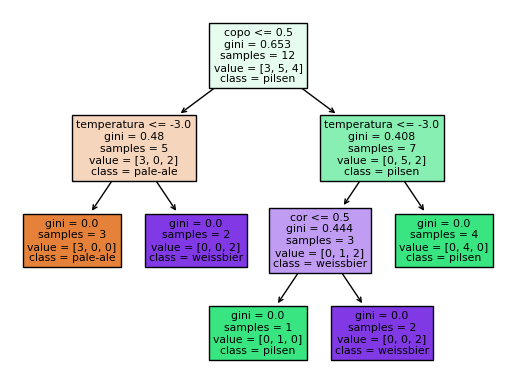

In [17]:
import matplotlib.pyplot as plt
tree.plot_tree(arvore,
               class_names=arvore.classes_,
               feature_names=features,
               filled=True)
plt.plot()

In [19]:
#["temperatura","copo","espuma","cor"]
#-5, mud,não,clara
probabilidades = arvore.predict_proba([[-5,1,0,0]])[0]
pd.Series(probabilidades,arvore.classes_)

/home/andre/.cache/pypoetry/virtualenvs/introducao-machine-learning-3awspm4o-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


pale-ale     0.0
pilsen       1.0
weissbier    0.0
dtype: float64